In [1]:
library(singscore)
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Set random seed so this part is reproducible
# https://www.random.org/ 2023-08-09
set.seed(3866) 

In [3]:
test_minmax <- read.table("../../../../data/expression/processed/response-subtype-test/V4//IO-Atlas-NSCLC-NSCLC-Response-Cluster-2-TPM-MinMaxNorm-TEST-2023-08-10-V4.tsv", 
                          sep='\t', 
                          row.names=1, 
                          header=T)

test_label <- read.table("../../../../data/expression/processed/response-subtype-test/V4/IO-Atlas-NSCLC-NSCLC-Response-Cluster-2-LABEL-TEST-2023-08-10-V4.tsv", 
                         sep='\t', 
                         row.names=1, 
                         header=F)

In [4]:
test_label

,V2
,<int>
SU2CLC-DFC-DF0790-T1,1
SU2CLC-CLE-NIVO18-T1,0
SU2CLC-DFC-DF0033-T1,0
SU2CLC-DFC-1015-T2,0
SU2CLC-COL-1027-T1,0
SU2CLC-CLE-NIVO20-T1,1
SU2CLC-DFC-1538-T1,0
SU2CLC-COL-1036-T1,1
SU2CLC-UCD-1142-T1,1


In [5]:
gs <- read.table("../../../../data/gs/IO-Atlas-NSCLC-NSCLC-Response-Cluster-2-TPM-MinMaxNorm-TRAIN-2023-08-10-V4-gene-sets.tsv",
                 sep='\t', 
                 header=T)

In [6]:
unique(gs$gs)

[1] "ratio-cluster-0" "ratio-cluster-1"

In [7]:
cluster0_up <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster0_dwn <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "down")) %>% pull("gene") %>% unique()

cluster1_up <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster1_dwn <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "down")) %>% pull("gene") %>% unique()

cluster2_up <- gs %>% filter((gs == "ratio-cluster-2") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster2_dwn <- gs %>% filter((gs == "ratio-cluster-2") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster3_up <- gs %>% filter((gs == "ratio-cluster3") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster3_dwn <- gs %>% filter((gs == "ratio-cluster3") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster4_up <- gs %>% filter((gs == "ratio-cluster4") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster4_dwn <- gs %>% filter((gs == "ratio-cluster4") & (direction == "down")) %>% pull("gene") %>% unique()

In [8]:
rnk <- rankGenes(test_minmax)

In [9]:
cluster0score <- simpleScore(rnk, upSet = cluster0_up, downSet = cluster0_dwn)
cluster1score <- simpleScore(rnk, upSet = cluster1_up, downSet = cluster1_dwn)
cluster2score <- simpleScore(rnk, upSet = cluster2_up, downSet = cluster2_dwn)
#cluster3score <- simpleScore(rnk, upSet = cluster3_up, downSet = cluster3_dwn)
#cluster4score <- simpleScore(rnk, upSet = cluster4_up, downSet = cluster4_dwn)

cluster0score["response"] <- test_label
cluster1score["response"] <- test_label
cluster2score["response"] <- test_label
#cluster3score["response"] <- test_label
#cluster4score["response"] <- test_label

Warning message in `[<-.data.frame`(`*tmp*`, "response", value = structure(list(:
“replacement element 1 has 18 rows to replace 0 rows”


In [10]:
cluster0score

,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion,response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SU2CLC.DFC.DF0790.T1,0.15119042,2925.170,0.29685631,2211.2979,-0.14566589,3639.042,1
SU2CLC.CLE.NIVO18.T1,0.20184521,4490.795,0.22397231,2760.6012,-0.02212710,6220.990,0
SU2CLC.DFC.DF0033.T1,-0.01306514,5718.759,-0.03969883,5162.4132,0.02663369,6275.104,0
SU2CLC.DFC.1015.T2,-0.20942662,5943.002,-0.14369646,5453.0028,-0.06573016,6433.001,0
SU2CLC.COL.1027.T1,0.34225721,2695.367,0.39321157,249.8181,-0.05095436,5140.916,0
SU2CLC.CLE.NIVO20.T1,0.11077240,3888.118,0.25108022,3123.0969,-0.14030782,4653.140,1
SU2CLC.DFC.1538.T1,-0.15284181,4339.941,-0.13750606,3438.8907,-0.01533575,5240.991,0
SU2CLC.COL.1036.T1,-0.26660344,2991.516,-0.03369161,3178.6944,-0.23291183,2804.338,1
SU2CLC.UCD.1142.T1,-0.08133784,4559.366,0.01335057,4731.7179,-0.09468842,4387.013,1


In [11]:
t.test(cluster0score %>% filter(response==1) %>% pull("TotalScore"), cluster0score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster0score %>% filter(response == 1) %>% pull("TotalScore") and cluster0score %>% filter(response == 0) %>% pull("TotalScore")
t = 0.53189, df = 15.981, p-value = 0.6021
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1534097  0.2561629
sample estimates:
  mean of x   mean of y 
-0.04435295 -0.09572958 


In [12]:
t.test(cluster1score %>% filter(response==1) %>% pull("TotalScore"), cluster1score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster1score %>% filter(response == 1) %>% pull("TotalScore") and cluster1score %>% filter(response == 0) %>% pull("TotalScore")
t = 2.5274, df = 15.999, p-value = 0.02241
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04670676 0.53272623
sample estimates:
 mean of x  mean of y 
0.38460848 0.09489198 


In [13]:
t.test(cluster2score %>% filter(response==1) %>% pull("TotalScore"), cluster1score %>% filter(response==0) %>% pull("TotalScore"))

ERROR: Error in t.test.default(cluster2score %>% filter(response == 1) %>% pull("TotalScore"), : not enough 'x' observations


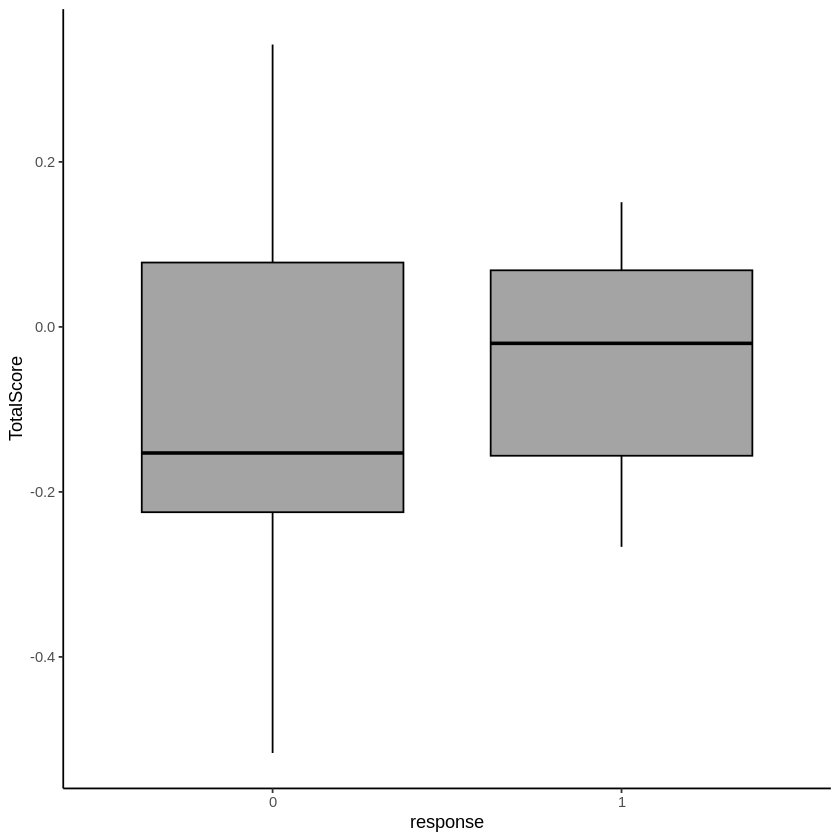

In [14]:
p<-ggplot(cluster0score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

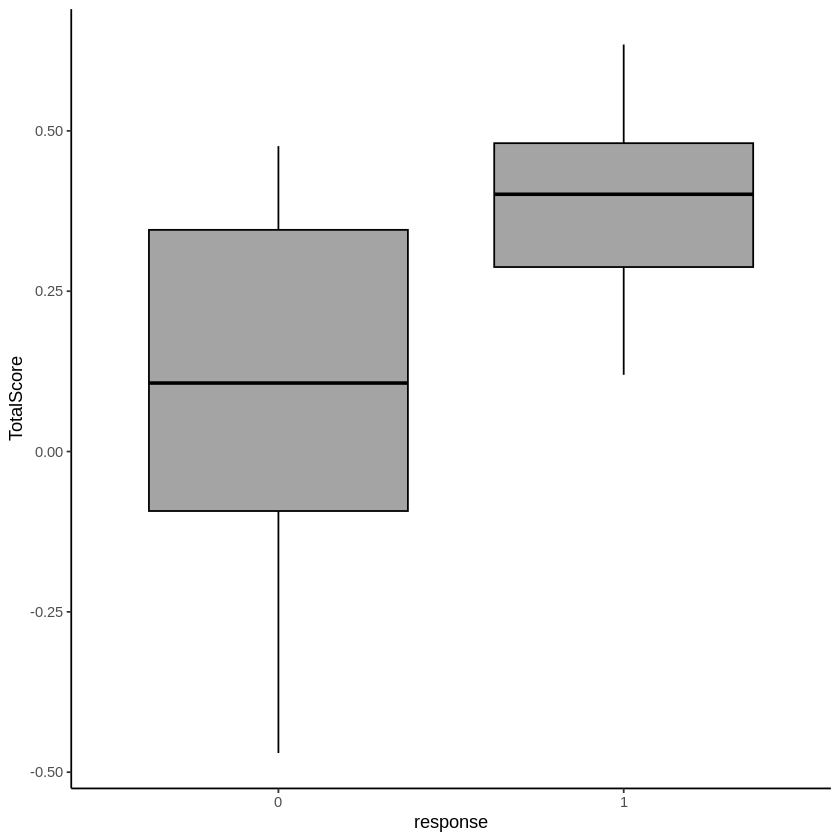

In [15]:
p<-ggplot(cluster1score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

In [ ]:
p<-ggplot(cluster2score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p